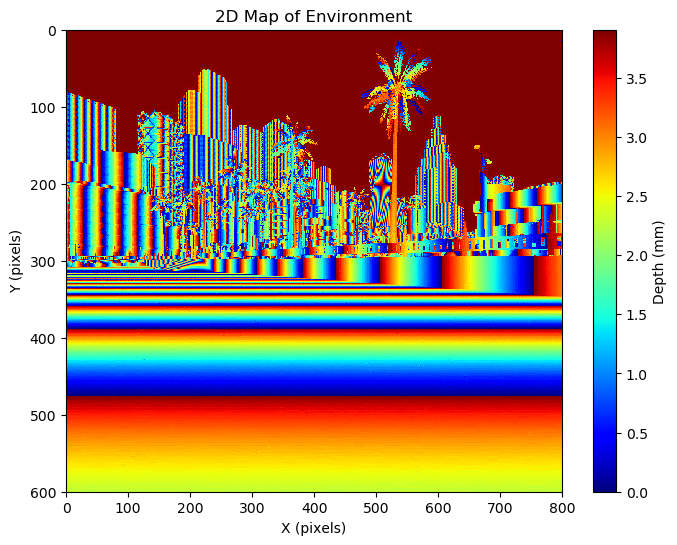

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Read depth image
depth_img = mpimg.imread('Rubens test files/Pictures/Depth_image.jpg')

# Extract depth values from the depth image
R = depth_img[:,:,0]
G = depth_img[:,:,1]
B = depth_img[:,:,2]
depth_values = (R + G * 256 + B * 256 * 256) / (256 * 256 * 256 - 1) * 1000  # Convert depth units to millimeters

# Create 2D grid representing the environment
map_height, map_width = depth_values.shape
environment_map = np.zeros((map_height, map_width))

# Populate the grid with depth values
environment_map = depth_values

# Visualize the 2D map
plt.figure(figsize=(8, 6))
plt.imshow(environment_map, cmap='jet', aspect='auto')  # You can choose any colormap you prefer
plt.colorbar(label='Depth (mm)')
plt.title('2D Map of Environment')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.show()


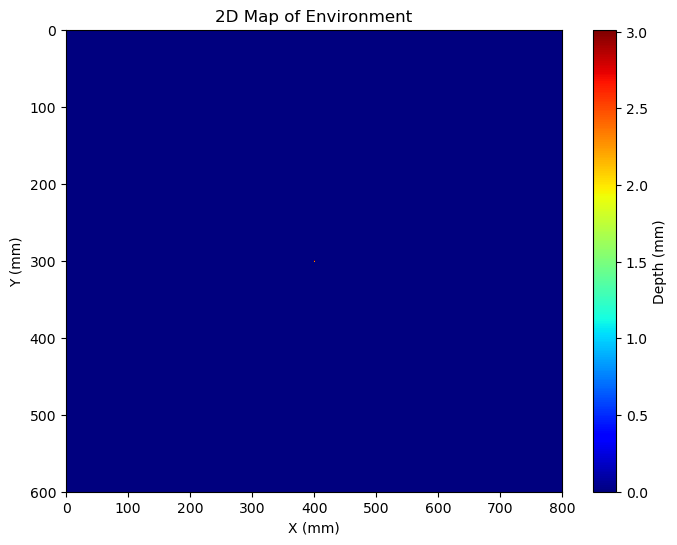

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Read depth image
depth_img = mpimg.imread('Rubens test files/Pictures/Depth_image.jpg')

# Extract depth values from the depth image
R = depth_img[:,:,0]
G = depth_img[:,:,1]
B = depth_img[:,:,2]
depth_values = (R + G * 256 + B * 256 * 256) / (256 * 256 * 256 - 1)  # Normalize depth values to range [0, 1]

# Camera parameters
fov = 90  # Field of view in degrees
image_width = 800  # Image width in pixels
image_height = 600  # Image height in pixels

# Calculate focal length based on FOV
focal_length = image_width / (2 * np.tan(np.deg2rad(fov) / 2))

# Calculate map dimensions based on FOV and focal length
map_width = 2 * focal_length
map_height = (image_height / image_width) * map_width

# Calculate pixel size in the map
pixel_size = map_width / image_width

# Create 2D map representing the environment
environment_map = np.zeros((int(map_height), int(map_width)))

# Calculate center coordinates of the map
map_center_x = int(map_width / 2)
map_center_y = int(map_height / 2)

# Map each pixel to the corresponding position in the map based on depth value
for y in range(image_height):
    for x in range(image_width):
        depth = depth_values[y, x]
        if depth > 0:  # Exclude invalid depth values
            # Calculate position in the map based on depth and camera parameters
            map_x = (x - image_width / 2) * (depth / focal_length) + map_center_x
            map_y = (y - image_height / 2) * (depth / focal_length) + map_center_y
            environment_map[int(map_y), int(map_x)] = depth * 1000  # Convert depth from meters to millimeters

# Visualize the 2D map
plt.figure(figsize=(8, 6))
plt.imshow(environment_map, cmap='jet', aspect='auto')  # You can choose any colormap you prefer
plt.colorbar(label='Depth (mm)')
plt.title('2D Map of Environment')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.show()
